<a href="https://colab.research.google.com/github/mina0502/SM04/blob/master/py_modules/py_module_2A_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application of numpy & matplotlib to mnist data

> Go colab

### Images of hand-written numbers in sample_data folder of colab

In [1]:
ls

sample_data/


In [0]:
ls sample_data

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
import numpy as np

### train data set
- 20000 images with targets

In [0]:
data = np.loadtxt("sample_data/mnist_train_small.csv", delimiter=",")

In [5]:
data.shape

(20000, 785)

#### Hand-written number images and target level
- data: images of hand-written numbers (28 X 28 pixels)
- target: numbers (0 ~ 9)  

In [6]:
data[:,0]  # target (hand-written numbers)

array([6., 5., 7., ..., 2., 9., 5.])

In [7]:
data[-1,0]

5.0

In [8]:
data[-5:,0]

array([0., 1., 2., 9., 5.])

In [9]:
data[:,0].shape  # target of 20,000 hand-written images
# target = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(20000,)

In [0]:
target = data[:,0]

In [11]:
target[:5],target[-5:]

(array([6., 5., 7., 9., 5.]), array([0., 1., 2., 9., 5.]))

In [12]:
ndata = data[:,1:]  # ndata (iamge of hand-written numbers), 784 pixels for each number
print(ndata.shape)
print("784 = {}".format(28*28))

(20000, 784)
784 = 784


### 행벡터(1X784)를 이미지 배열 (28X28)로 재구성

In [13]:
ndata[0,0:]  # first number

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  24.,  67.,  67.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 13

In [14]:
ndata[0,0:].shape, target[0]  # 첫번째 숫자는 6   

((784,), 6.0)

In [0]:
first_num = ndata[0,0:].reshape(28,28)

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

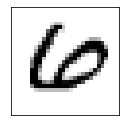

In [17]:
plt.figure(figsize=(2, 2))
plt.imshow(first_num, cmap=mpl.cm.binary) #bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

######**last_num**

In [0]:
last_num = ndata[-1,0:].reshape(28,28)

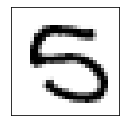

In [19]:
plt.figure(figsize=(2, 2))
plt.imshow(last_num, cmap=mpl.cm.binary) #bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
target[0],target[-1]   # check number 

(6.0, 5.0)

### Show images of some numbers in train dataset

값,딕셔너리 구조,**(사용자가 추가하는 딕셔너리 구조)
instances => 숫자그림 list

In [0]:
# function plot_digits
# import numpy as np
# import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row) #작으면 작은만큼만 보여줌
    images = [instance.reshape(size,size) for instance in instances] # 각그림마다 reshape 해서 (28,28)이라는 이미지 개체 배열에 집어넣음 ==> 리스트 내포
    n_rows = (len(instances) - 1) // images_per_row + 1 # 한줄 코드 page 개수 찾는 법''
    row_images = [] # 한 행에 들어갈 수 있는 배열
    n_empty = n_rows * images_per_row - len(instances) #숫자가 들어가지 않는 곳은 공백으로 그림
    images.append(np.zeros((size, size * n_empty))) # 공백으로 그리는 곳 -> 0으로 채워줌
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1)) # 열로 채움(세로)
    image_all = np.concatenate(row_images, axis=0) # concatenate 행으로 채움 (가로)
    plt.imshow(image_all, cmap = mpl.cm.binary, **options)
    plt.axis("off")

### images of  reshaped ndata

In [23]:
ndata[:34].shape

(34, 784)

np.r_

#r_ // n 개를 row(열)로 그림

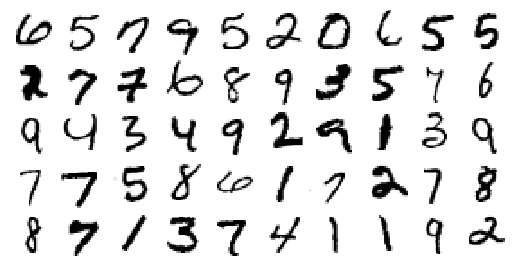

In [25]:
plt.figure(figsize=(9,9))
example_images = np.r_[ndata[:50]]
plot_digits(example_images, images_per_row=10)

plt.show()

### 처음 숫자 50개 확인

In [26]:
target[:50].reshape(5,10)

array([[6., 5., 7., 9., 5., 2., 0., 6., 5., 5.],
       [2., 7., 7., 6., 8., 9., 3., 5., 7., 6.],
       [9., 4., 3., 4., 9., 2., 9., 1., 3., 9.],
       [7., 7., 5., 8., 6., 1., 7., 2., 7., 8.],
       [8., 7., 1., 3., 7., 4., 1., 1., 9., 2.]])

**알고 있는 데이터를 가지고 머신러닝 --> 지도 학습**



---



#### 테스트데이터 샘플을 로드하여 확인해보자.

### Test data set

In [27]:
ls sample_data

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
tdata = np.loadtxt("sample_data/mnist_test.csv", delimiter=",")

In [0]:
tdata.shape

(10000, 785)

In [29]:
# target of test data
ty = tdata[:,0]
ty

array([7., 2., 1., ..., 4., 5., 6.])

In [0]:
# test data
tX = tdata[:,1:]

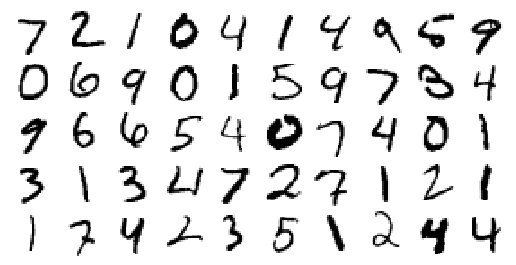

In [31]:
# Plot first 50 digits
plt.figure(figsize=(9,9))
example_images = np.r_[tX[:50]]
plot_digits(example_images, images_per_row=10)

plt.show()

In [32]:
ty[:50].reshape(5,10)

array([[7., 2., 1., 0., 4., 1., 4., 9., 5., 9.],
       [0., 6., 9., 0., 1., 5., 9., 7., 3., 4.],
       [9., 6., 6., 5., 4., 0., 7., 4., 0., 1.],
       [3., 1., 3., 4., 7., 2., 7., 1., 2., 1.],
       [1., 7., 4., 2., 3., 5., 1., 2., 4., 4.]])



---



#### train data set를 80% 트레이닝데이터와 20% 검증(validation)데이터로 분리하기
- train data set : ndata  (20000, 784)
- sklearn module 사용


In [0]:
# sklearn module: Python machine learning
from sklearn.model_selection import train_test_split

In [51]:
ndata.shape,ndata.shape[0],ndata.shape[1] # tuple Indexing [0] : 숫자데이터 갯수 [1] : 그림 데이터

((20000, 784), 20000, 784)

In [0]:
def train_val_split(data, val_pct=0.2): #main training : 80% , Test:20%
    size = data.shape[0]
    train, val = train_test_split(data, test_size=val_pct)
    return train, val

In [53]:
train, val = train_val_split(ndata)
train.shape,val.shape

# train_test_split(data, test_size=0.2)

((16000, 784), (4000, 784))

#### 분리된 데이터를 딕셔너리로 관리

In [0]:
dataset = dict()
dataset["train"], dataset["val"] = train_val_split(data)

In [55]:
type(dataset["train"]), type(dataset["val"])

(numpy.ndarray, numpy.ndarray)

In [56]:
dataset["train"].shape, dataset["val"].shape

((16000, 785), (4000, 785))



---



#### train-val-test splitting (80%, 10%, 10%)

In [0]:
def train_val_test_split(data, val_pct=0.1, test_pct=0.1):
    size = data.shape[0]
    val_pct = (val_pct * size) / (size * (1 - test_pct))
    train_val, test = train_test_split(data, test_size=test_pct)
    train, val = train_test_split(train_val, test_size=val_pct)
    return train, val, test

In [80]:
train,val,test = train_val_test_split(data,0.1,0.1)
print(train.shape)
print(val.shape)
print(test.shape)

(16000, 785)
(2000, 785)
(2000, 785)


#### ndata를 60%,20%,20%의 train, val, test 로 분리하고 shape를 확인해보시오.

In [83]:
train,val,test =train_val_test_split(ndata,val_pct=0.2,test_pct=0.2)
print(train.shape)
print(val.shape)
print(test.shape)

(12000, 784)
(4000, 784)
(4000, 784)
